In [2]:
%matplotlib ipympl
from scipy.signal import convolve
from matplotlib import pyplot as plt
from scriptos.fwhm_vs_amp import find_fwhm_vec_vs_rabi
from simi.args import *
from simi.utils import FWHM
from scriptos.spectroscopy_vs_amplitude import run_all, plot_1d, plot_2d
from simi.args import qubit_args, MHz
from matplotlib import pyplot as plt
from numpy import pi



def find_fwhm(x, y, z,echo):
    FWHMs = []
    SNRs = []
    for zi in z:
        try:
            mu, fwhm, snr = FWHM(x, zi, plot=False, echo=echo)
        except:
            fwhm = None
            snr = None
            print("no FWHM!")
        FWHMs.append(fwhm)
        SNRs.append(snr)

    return np.array(FWHMs), np.array(SNRs)

T1: 30.00 us
T2: 15.00 us
T2 limit: 21.22 kHz
broadening condition:
14.142135623730953 kHz


In [5]:
qubit_args["cutoff"] = 2e-4
qubit_args["rabi_points"] = 251
qubit_args["detuning_points"] = 251
qubit_args["detuning_span"] = 0.25 * MHz * 2 * pi
qubit_args["rabi_frequency"] = 50 * MHz * 2 * pi
qubit_args["eco_pulse"] = True
qubit_args["pulse_length"] = 40e-6
qubit_args["pulse_type"] = "lorentzian"
qubit_args["full_state"] = False


detunings, amplitudes, z_echo = run_all(args=qubit_args)



Amplitude = 0/251
Amplitude = 1/251
Amplitude = 2/251
Amplitude = 3/251
Amplitude = 4/251


Traceback (most recent call last):
Traceback (most recent call last):
Process ForkProcess-2047:
Traceback (most recent call last):
  File "/Users/asafsolonnikov/.conda/envs/myenv/lib/python3.12/site-packages/qutip/solver/integrator/scipy_integrator.py", line 63, in _mul_np_vec
  File "/Users/asafsolonnikov/.conda/envs/myenv/lib/python3.12/site-packages/qutip/solver/integrator/scipy_integrator.py", line 67, in _mul_np_vec
  File "/Users/asafsolonnikov/.conda/envs/myenv/lib/python3.12/site-packages/qutip/solver/integrator/scipy_integrator.py", line 63, in _mul_np_vec
            Traceback (most recent call last):
def _mul_np_vec(self, t, vec):def _mul_np_vec(self, t, vec):state = _data.dense.fast_from_numpy(vec)  File "/Users/asafsolonnikov/.conda/envs/myenv/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()



  File "/Users/asafsolonnikov/.conda/envs/myenv/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._

KeyboardInterrupt: 

In [6]:


fwhms, SNRs = find_fwhm(detunings, amplitudes, z_echo,echo=True)


z_echo


FWHM (calculated): 94192.80180123798
FWHM (calculated): 121692.03631597426
FWHM (calculated): 121302.4802638916
FWHM (calculated): 121513.67663146414
FWHM (calculated): 121534.86851094075
FWHM (calculated): 121557.7817434666
FWHM (calculated): 121532.22932186724
FWHM (calculated): 121569.28547562445
FWHM (calculated): 121591.14292496954
FWHM (calculated): 121633.80701476004
FWHM (calculated): 121682.17289436326
FWHM (calculated): 121732.4547382398
FWHM (calculated): 121780.11591283436
FWHM (calculated): 121846.33460676658
FWHM (calculated): 121914.10466461915
FWHM (calculated): 121979.48257013605
FWHM (calculated): 122061.9052640069
FWHM (calculated): 122140.23990379628
FWHM (calculated): 122238.88168223995
FWHM (calculated): 122314.09005398402
FWHM (calculated): 122407.92825839085
FWHM (calculated): 122501.53052890519
FWHM (calculated): 122596.60556063977
FWHM (calculated): 122702.54039189675
FWHM (calculated): 122816.61801024796
FWHM (calculated): 122922.75963575978
FWHM (calculated)

array([[3.76043217e-24, 3.69701317e-24, 3.63410357e-24, ...,
        3.63410357e-24, 3.69701317e-24, 3.76043217e-24],
       [3.28402270e-05, 3.28268000e-05, 3.27962210e-05, ...,
        3.27962210e-05, 3.28268000e-05, 3.28402270e-05],
       [1.31343713e-04, 1.31288633e-04, 1.31164264e-04, ...,
        1.31164264e-04, 1.31288633e-04, 1.31343713e-04],
       ...,
       [4.55138519e-01, 4.54802839e-01, 4.54334572e-01, ...,
        4.54334572e-01, 4.54802839e-01, 4.55138519e-01],
       [4.55578163e-01, 4.55242442e-01, 4.54774543e-01, ...,
        4.54774543e-01, 4.55242442e-01, 4.55578163e-01],
       [4.56009989e-01, 4.55673394e-01, 4.55205072e-01, ...,
        4.55205072e-01, 4.55673394e-01, 4.56009989e-01]], shape=(251, 251))

FWHM (calculated): 123552.00623034073


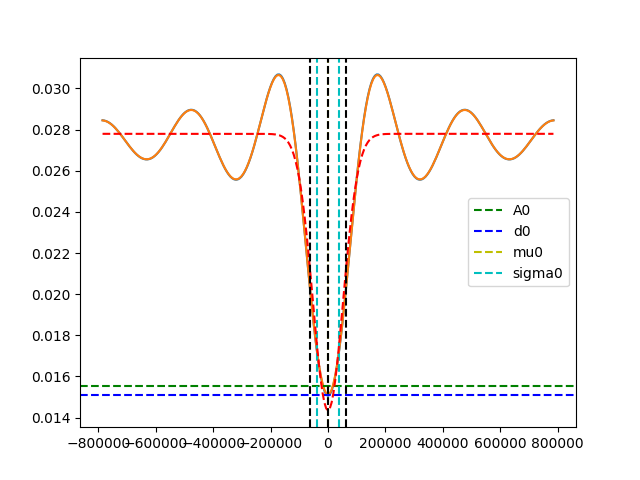

(np.float64(-0.1879902935254112),
 np.float64(123552.00623034073),
 np.float64(0.013445350493750008))

In [7]:
zi = z_echo[30]

FWHM(detunings, zi, plot=True, echo=True)




In [1]:
fwhms, snrs = find_fwhm(detunings,amplitudes, z_echo, echo=True)

NameError: name 'find_fwhm' is not defined

 $\sigma$ = 1102.7 Hz


(0.1, 100.0)

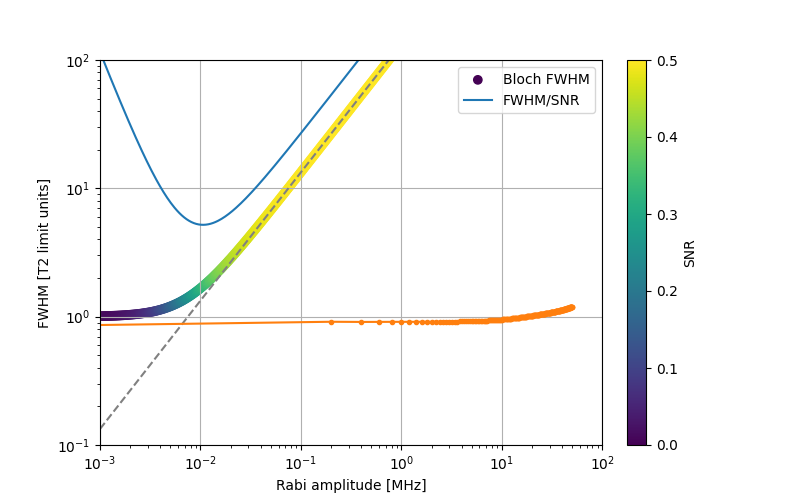

In [16]:

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

find_fwhm_vec_vs_rabi(ax)
ax.plot(
    amplitudes / 2 / pi / MHz,
    fwhms / T2_limit / pi/2,
    '.-'
)

ax.set_xlim(1e-3, 1e2)
ax.set_ylim(1e-1, 1e2)

